## Reconocedor de Acordes Básico, Referencia [AQUI](https://github.com/keunwoochoi/dl4mir/blob/master/Example%202%20-%20a%20chord%20recognition%20network%20with%20Convolutional%20layers.ipynb)

In [1]:
%matplotlib inline
import numpy as np
import librosa
import keras
import keras.backend as K
from matplotlib import pyplot as plt
from future.utils import implements_iterator  # for python 2 compatibility for __next__()

import warnings
warnings.filterwarnings('ignore')

## Importamos las clases que permiten generar datos artificiales

In [2]:
from model import DataGenerator

## Generamos data artificial

In [3]:
# Example usage:
data_gen = DataGenerator()
sample_batch = data_gen[0]
print(sample_batch)

Fetching batch 0
(array([[[[0.5165493 ],
         [0.2959649 ],
         [0.31647766]],

        [[0.52327424],
         [0.3007255 ],
         [0.28463915]],

        [[0.45901114],
         [0.30145738],
         [0.28412056]],

        ...,

        [[0.28248823],
         [0.30095068],
         [0.3180021 ]],

        [[0.28693777],
         [0.300447  ],
         [0.2950817 ]],

        [[0.27747878],
         [0.28526056],
         [0.32001734]]],


       [[[0.5165493 ],
         [0.2959649 ],
         [0.31647766]],

        [[0.52327424],
         [0.3007255 ],
         [0.28463915]],

        [[0.45901114],
         [0.30145738],
         [0.28412056]],

        ...,

        [[0.28248823],
         [0.30095068],
         [0.3180021 ]],

        [[0.28693777],
         [0.300447  ],
         [0.2950817 ]],

        [[0.27747878],
         [0.28526056],
         [0.32001734]]],


       [[[0.4893687 ],
         [0.24298328],
         [0.2794338 ]],

        [[0.49436644],
    

In [4]:
# Extract x and y
x, y = sample_batch

# Now you can use x and y as needed
print("Input data (x):", x.shape)
print("Target data (y):", y.shape)

Input data (x): (128, 36, 3, 1)
Target data (y): (128, 2)


## Observando los datos que entrenarán al modelo

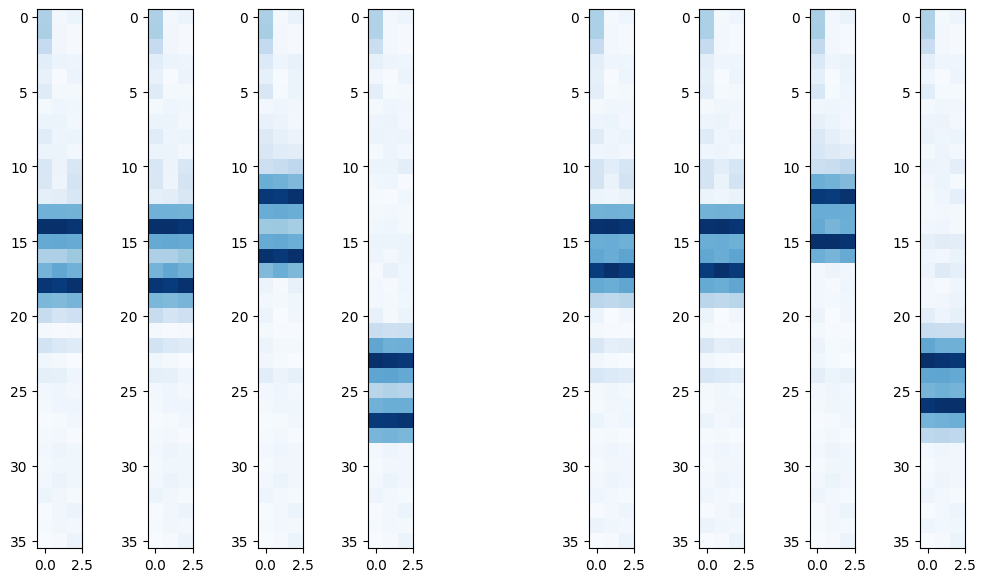

In [5]:
plt.figure(figsize=(14, 7))
if K.image_data_format == 'channels_first':
    for i in range(4):
        plt.subplot(1, 10, i+1)
        plt.imshow(x[i, 0], cmap=plt.get_cmap('Blues'))
        plt.subplot(1, 10, 6+i)
        plt.imshow(x[64 + i, 0], cmap=plt.get_cmap('Blues'))
else:
    for i in range(4):
        plt.subplot(1, 10, i+1)
        plt.imshow(x[i, :, :, 0], cmap=plt.get_cmap('Blues'))
        plt.subplot(1, 10, 6+i)
        plt.imshow(x[64 + i, :, :, 0], cmap=plt.get_cmap('Blues'))

## Data de Validación

In [6]:
val_datagen = DataGenerator() # this is a generator for validation set

## Modelo

[Parámetros](https://keras.io/api/layers/convolution_layers/convolution2d/)

In [7]:
np.random.seed(12345)
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(4, (5, 3), use_bias=False, padding='valid',
                             input_shape=data_gen.cqt_shape)) # A conv2d layer (36 input nodes --> 8 output nodes)
model.add(keras.layers.GlobalMaxPooling2D())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(data_gen.n_class, use_bias=False))
model.add(keras.layers.Activation('softmax'))

model.compile(optimizer=keras.optimizers.legacy.SGD(lr=0.01, momentum=0.9,  # a pretty standard optimizer
                                             decay=1e-6, nesterov=True),
              loss='categorical_crossentropy',  # categorical crossentropy makes sense with Softmax
              metrics=['accuracy'])  # we'll also measure the performance but it's NOT a loss function  

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 1, 4)          60        
                                                                 
 global_max_pooling2d (Glob  (None, 4)                 0         
 alMaxPooling2D)                                                 
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 2)                 8         
                                                                 
 activation_1 (Activation)   (None, 2)                 0         
                                                                 
Total params: 68 (272.00 Byte)
Trainable params: 68 (272.00 Byte)
Non-trainable params: 0 (0.00 Byte)
____________________

## Entrenando

In [9]:
history = model.fit_generator(data_gen, steps_per_epoch=len(data_gen), epochs=15, verbose=1,
                             validation_data=val_datagen, validation_steps=4)

Fetching batch 0
Epoch 1/15
Fetching batch 6
Fetching batch 15
Fetching batch 10
 1/24 [>.............................] - ETA: 3s - loss: 0.8468 - accuracy: 0.5000Fetching batch 1
Fetching batch 18
Fetching batch 3
Fetching batch 13
Fetching batch 12
Fetching batch 17
Fetching batch 16
Fetching batch 5
Fetching batch 4
Fetching batch 9
Fetching batch 22
Fetching batch 14
Fetching batch 19
Fetching batch 23
Fetching batch 2
Fetching batch 11
Fetching batch 0
Fetching batch 20
Fetching batch 21
Fetching batch 7
Fetching batch 8
Fetching batch 0
Fetching batch 0
Fetching batch 1
Fetching batch 2
Fetching batch 3
Fetching batch 4
Fetching batch 5
24/24 [==============================] - 0s 5ms/step - loss: 0.7094 - accuracy: 0.5768 - val_loss: 0.6791 - val_accuracy: 0.7305
Epoch 2/15
Fetching batch 13
Fetching batch 18
Fetching batch 6
 1/24 [>.............................] - ETA: 0s - loss: 0.6789 - accuracy: 0.7500Fetching batch 0
Fetching batch 8
Fetching batch 1
Fetching batch 19
Fetch

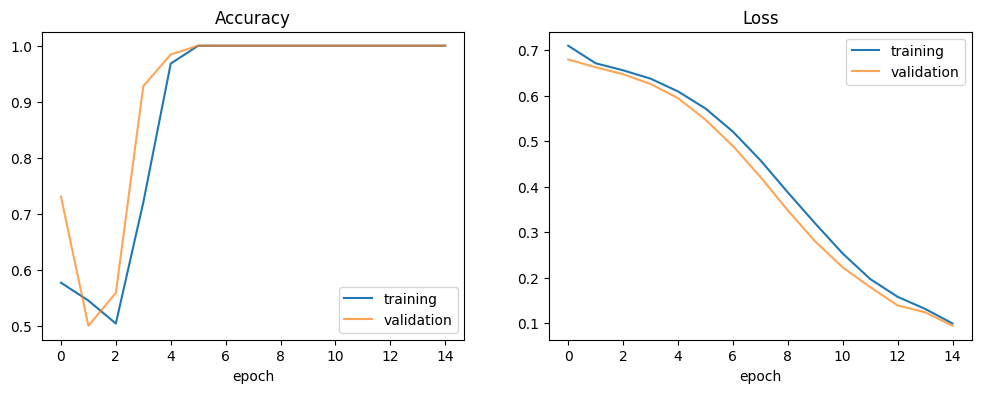

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation', alpha=0.7)
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation', alpha=0.7)
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()

In [15]:
loss = model.evaluate_generator(data_gen, steps=10)
print("loss: {}, accuracy: {}".format(loss[0], loss[1]))

Fetching batch 0
Fetching batch 0
Fetching batch 1
Fetching batch 2
Fetching batch 3
Fetching batch 4
Fetching batch 5
Fetching batch 6
Fetching batch 7
Fetching batch 8
Fetching batch 9
Fetching batch 10
Fetching batch 11
loss: 0.09341885149478912, accuracy: 1.0


In [16]:
weights = model.get_weights()[0]
print("The Convolution2D layer weights shape is: {}".format(weights.shape))

The Convolution2D layer weights shape is: (5, 3, 1, 4)


## Visualizando los kernels

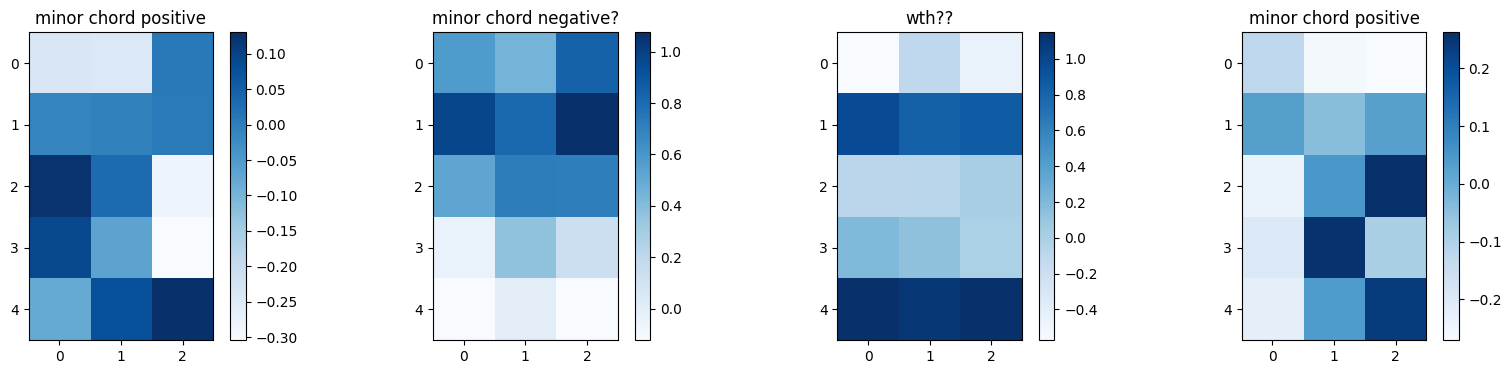

In [17]:
plt.figure(figsize=(20, 4))
titles = ['minor chord positive', 'minor chord negative?', 'wth??', 'minor chord positive']
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(weights[:, :, 0, i], cmap=plt.get_cmap('Blues'))
    plt.colorbar()
    plt.title(titles[i])

## Visualizando los features aprendidos

Camino alternativo al visto en el ejemplo más básico

In [18]:
x_major = np.squeeze(x[0])
x_minor = np.squeeze(x[-1])
from scipy import signal
def plot_convolution(x, kernels):
    """kernels: 3d, (height, width, channel) and four channels."""
    n_kernels = kernels.shape[2]
    plt.figure(figsize=(9, 5))
    plt.subplot(1, n_kernels+1, 1)
    plt.imshow(x)
    plt.title('Input x')
    for idx in range(n_kernels):
        plt.subplot(1, n_kernels+1, idx+2)
        conved = signal.convolve2d(x, kernels[:, :, idx], mode='same')
        plt.imshow(conved)
        plt.title('max: {:4.2f}'.format(np.max(conved)))

Here's the feature map activation for a Major chord input


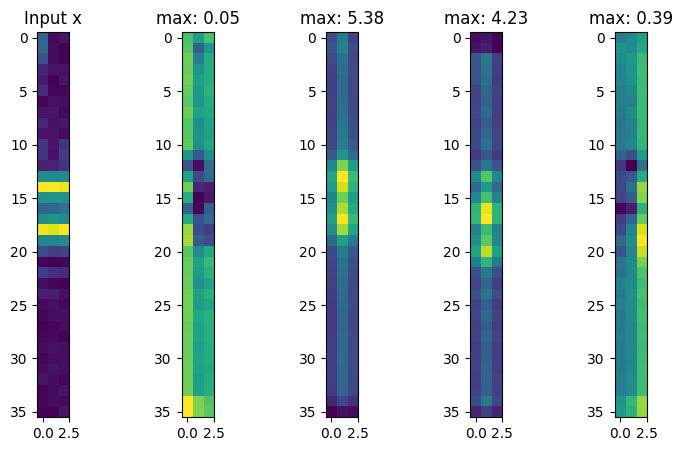

In [19]:
plot_convolution(x_major, weights[:, :, 0, :])
print("Here's the feature map activation for a Major chord input")

Here's for a minor chord input


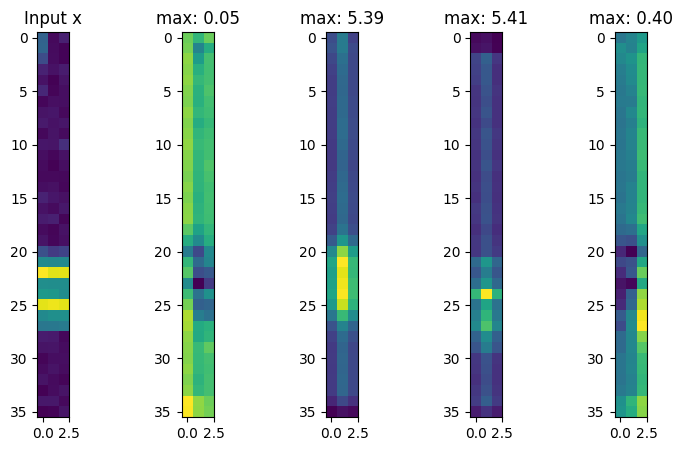

In [20]:
plot_convolution(x_minor, weights[:, :, 0, :])
print("Here's for a minor chord input")

In [21]:
dense_weights = model.get_weights()[1]
print(dense_weights)

[[-0.04640429  0.79198945]
 [ 2.2585974  -0.9779892 ]
 [-2.0800729   1.566522  ]
 [ 0.609361    0.4450946 ]]
